# Model selection

Up to now, we have seen many ways to use models from the `sklearn` library to help solve your machine learning problems. Once you know how to use these models, an important question is that of model selection.

In this section of the tutorial, we will deal with two important questions related to model selection:
1. How to select a model that achieves a reasonable trade-off between underfitting (aka bias) and overfitting (aka variance);
2. How to perform parameter tuning with `sklearn`.

## Underfitting _vs_ overfitting

Let us consider the problem of explaining variable `y` using covariate `X` in the following case:

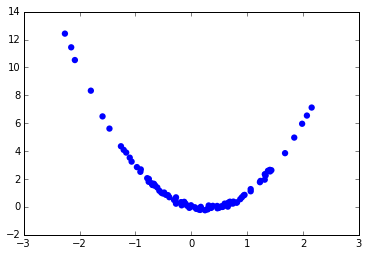

In [1]:
%matplotlib inline

from sklearn.linear_model import LinearRegression, Lasso
import matplotlib.pyplot as plt
import numpy as np

X = np.random.randn(100, 1)
y = 2 * X ** 2 - X + .1 * np.random.randn(100, 1)
plt.scatter(X, y, s=40, edgecolors="none")

Of course, if we want to fit a linear regression model to this data, we do not get great results:

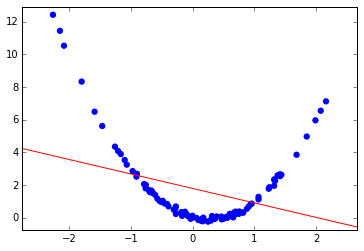

In [2]:
def plot_regression(regressor, data, y):
    plt.scatter(data[:, 0], y, s=40, edgecolors="none")
    x_left, x_right = data[:,0].min() - .5, data[:,0].max() + .5
    y_left, y_right = regressor.predict([[x_left], [x_right]])
    plt.plot([x_left, x_right], [y_left, y_right], color="r")
    plt.xlim(data[:,0].min() - .5, data[:,0].max() + .5)
    plt.ylim(y.min() - .5, y.max() + .5)

regressor = LinearRegression()
regressor.fit(X, y)
plot_regression(regressor, X, y)

We are in a case of underfitting: our model is not complex enough to explain our data.